# Exploratory Data Analysis of Students Performance in Exams

### Objective of Analysis 
To understand that how the student's performance (test scores) is affected by the other variables (Gender, Ethnicity, Parental level of education, Lunch, Test preparation course).
### Some of the questions that this analysis will try to answer are:
1) Does the gender of student plays a role in how they perform in various courses.<br>
2) Does the educational background of the parents impact the students performance.<br>
3) Does the ethnicity of the student has an impact on their performance.<br>
4) Is completing the Test Preparation course help the students in performing better.<br>
5) Does the quality of lunch the students consume leaves an impact on how they perform.<br>

In [1]:
#Importing all the python libraries required for this analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## DESCRIPTIVE ANALYSIS

In [2]:
#Reading the dataframe and storing it in variable student_performance_data 
#Checking first 5 rows of the Dataframe
student_performance_data=pd.read_csv('StudentsPerformance (1).csv',sep=',')
student_performance_data.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
#Identifying the columns in the given Dataframe
student_performance_data.columns.tolist()

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course',
 'math score',
 'reading score',
 'writing score']

In [4]:
#Checking the shape of the dataframe. Data has 1000 rows and 8 columns
student_performance_data.shape

(1000, 8)

In [5]:
#Checking for Null values in the dataframe
student_performance_data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

As we can see there are no null values in the dataframe. This means that the data of all the students is complete and none of the information is missing.

In [6]:
#Uderstanding the basic information of the data like min, max, mean and standard deviation etc.
student_performance_data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [7]:
#This displays general information about the dataset with informations like the column names their data types 
#and the count of non-null values for every column.
student_performance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
#Gives the data types of all the columns values in the dataframe
student_performance_data.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

As we can see the columns: gender, race/ethinicity, parental level of education, lunch and test preparational course are CATERGORICAL Variables.



As we can see the columns: math score, writing score and reading score are NUMERICAL Variables.

#### Analysing the values of all CATEGORICAL Variables and check the data type of values

In [9]:
#Gives the types of categories present in each categorical variable 
student_performance_data['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

In [10]:
student_performance_data['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

In [11]:
student_performance_data['lunch'].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

In [12]:
student_performance_data['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

We will add a new column called 'Total Score' which will be basically the sum of the scores obtained in maths, writing and reading for every student. This feature will help in better analysing the overall performance of a student.

In [13]:
#Adding the column of total score in the dataframe
#Total score = math score + reading score + writing score
student_performance_data['total score']=student_performance_data['math score']+student_performance_data['reading score']+student_performance_data['writing score']

In [14]:
# We will see a new column of Total Score in the dataframe.Now there are 9 columns in the dataframe
student_performance_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [15]:
#Average Scores
print("Average math score is    : {}".format(np.mean(student_performance_data['math score'])))
print("Average reading score is : {}".format(np.mean(student_performance_data['reading score'])))
print("Average writing score is : {}".format(np.mean(student_performance_data['writing score'])))
print("Average total score is   : {}".format(np.mean(student_performance_data['total score'])/3))

Average math score is    : 66.089
Average reading score is : 69.169
Average writing score is : 68.054
Average total score is   : 67.77066666666667


We will also add a new column 'Pass/Fail', which will basically indicate the status of the student i.e. whether they have passed(P) or failed(F). To decide whether a student have passed we are evaluating a condition on the total score obtained by the student. We are assuming that the passing criterion if a student has a Total Score of 120 or above then they have Passed, otherwise, they Failed.

In [16]:
#Criterion for getting a passing grade
def result(TS,MS,WS,RS ):
    if(TS>120 and MS>40 and WS>40 and RS>40):
        return 'P'
    else:
        return 'F'

In [17]:
student_performance_data['Pass/Fail']=student_performance_data.apply(lambda x: result(x['total score'],x['math score'],x['writing score'],x['reading score']),axis = 1 )

In [18]:
#Checking the dataframe with pass/fail column.Now there are 10 columns in the dataframe
student_performance_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,Pass/Fail
0,female,group B,bachelor's degree,standard,none,72,72,74,218,P
1,female,group C,some college,standard,completed,69,90,88,247,P
2,female,group B,master's degree,standard,none,90,95,93,278,P
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,P
4,male,group C,some college,standard,none,76,78,75,229,P


Now we will check the number of students passed/failed according to the set passing criterion.

In [19]:
#Displays the number of students passed and failed according to the passing criterion
student_performance_data['Pass/Fail'].value_counts()

P    939
F     61
Name: Pass/Fail, dtype: int64

Hence out of 1000, only 939 students passed and the rest 61 students failed.<br>

## DATA VISUALIZATION

Now lets try to visualize the performance and exploring underlying trends.

Text(0.5, 1.0, 'Percentage of students Passed/Failed')

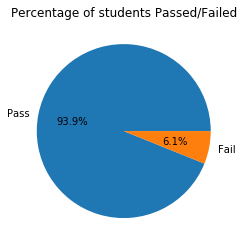

In [20]:
plt.pie(student_performance_data['Pass/Fail'].value_counts(),labels=['Pass','Fail'],autopct='%1.1f%%')
plt.title('Percentage of students Passed/Failed')

Text(0.5, 1.0, 'Bar-plot representing the count of students passed/failed')

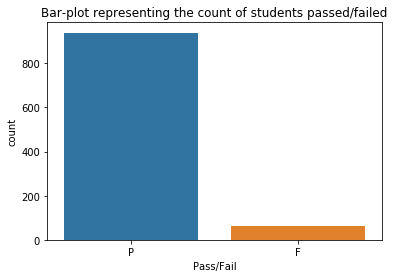

In [21]:
sns.countplot(student_performance_data['Pass/Fail'])
plt.title('Bar-plot representing the count of students passed/failed')

#### Impact of GENDER on Scores
As the dataset contains both male and female students, we will try to analyze the variation of performance across the gender of the student and will try to findout if one gender performed better than the other

In [22]:
# this displays the number of male and female students in the class
student_performance_data['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

So as we can see that out of the 1000 students in the dataset, 518 are female and 482 are male. Thus the ratio of male and female students are almost uniform. Now we will try to findout how did the male & female students performed when compared to each other.

In [23]:
#to find out the percentage of female students passed
print("Percentage of female students passed: {0:.2f}%"
    .format((student_performance_data[(student_performance_data['gender']=='female') & (student_performance_data['Pass/Fail']=='P')].shape[0]/student_performance_data[student_performance_data['gender']=='female'].shape[0])*100))

#to find out the percentage of male students passed
print("Percentage of male students passed: {0:.2f}%"
    .format((student_performance_data[(student_performance_data['gender']=='male') & (student_performance_data['Pass/Fail']=='P')].shape[0]/student_performance_data[student_performance_data['gender']=='male'].shape[0])*100))

Percentage of female students passed: 92.86%
Percentage of male students passed: 95.02%


Therefore from the above analysis we can observe that the male students have overall performed relatively better than the female students

Text(0, 0.5, 'Number of students')

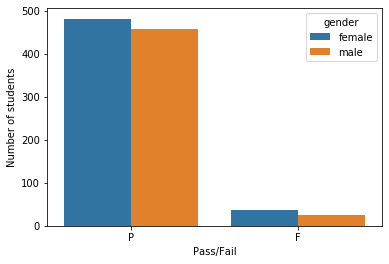

In [24]:
sns.countplot(student_performance_data['Pass/Fail'],hue = student_performance_data['gender'])
plt.ylabel('Number of students')

We can observe from the above count plot that there is a variation between how both the genders performed and we can see that the male students have performed overall better than the female students, next we will try to analyze the performance of the students in the three different subjects and their variation across the gender.

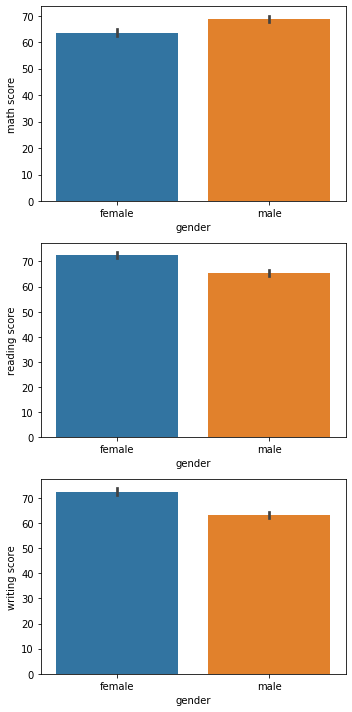

In [25]:
fig,ax = plt.subplots(3,1, figsize = (5,10))
sns.barplot(x=student_performance_data['gender'],y=student_performance_data['math score'], ax=ax[0], linewidth=2.5)
sns.barplot(x=student_performance_data['gender'],y=student_performance_data['reading score'], ax=ax[1],linewidth=2.5)
sns.barplot(x=student_performance_data['gender'],y=student_performance_data['writing score'], ax=ax[2],linewidth=2.5)
plt.tight_layout()

As can be seen from the above barplots that the male students have performed better in maths whereas the female students have relatively performed better than the male students in both reading and writing exams.

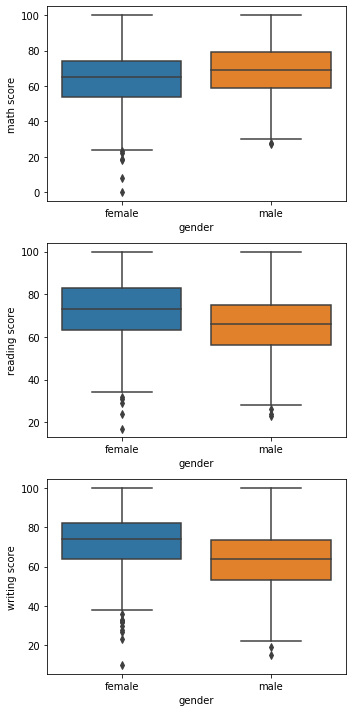

In [26]:
fig,ax = plt.subplots(3,1, figsize = (5,10))
sns.boxplot(x=student_performance_data['gender'],y=student_performance_data['math score'],ax=ax[0])
sns.boxplot(x=student_performance_data['gender'],y=student_performance_data['reading score'],ax=ax[1])
sns.boxplot(x=student_performance_data['gender'],y=student_performance_data['writing score'],ax=ax[2])
plt.tight_layout()

The boxplots represent the performance of the male students vs. the performance of the female students in the three courses separately. As can be seen from the medians and the number of outliers, it can be concluded that the female students performed relatively poorer than the male students in maths but they out-performed the male students in both reading and writing scores. Thus we can conclude that, in this case the performance of a student in a course varies with the gender.

#### Impact of RACE/ETHINICITY on Scores

In [27]:
#number of students belonging to each race/ethnic group
student_performance_data['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

Thus we can see that out of the 1000 students, 319 are from race group C, 262 are from group D,190 are from group B, 140 from group E and 89 are from the race group A. Now we will try to analyse how the students from the different race/ethnic groups have performed compared to each other.

The number of students passed across various race/ethnic group : 
group C    298
group D    249
group B    176
group E    134
group A     82
Name: race/ethnicity, dtype: int64


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

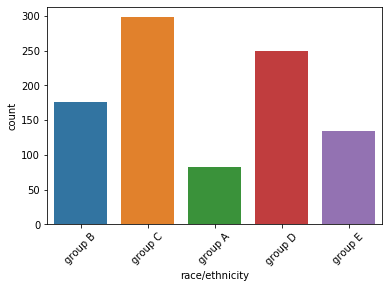

In [28]:
#number of students passed across the race/ethnic groups
print("The number of students passed across various race/ethnic group : ")
print(student_performance_data['race/ethnicity'].loc[student_performance_data['Pass/Fail']=='P'].value_counts())
sns.countplot(student_performance_data['race/ethnicity'].loc[student_performance_data['Pass/Fail']=='P'])
plt.xticks(rotation = 45)

Text(0, 0.5, 'Number of students')

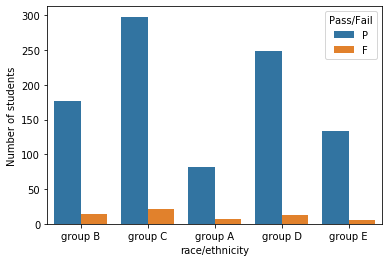

In [29]:
sns.countplot(student_performance_data['race/ethnicity'],hue=student_performance_data['Pass/Fail'])
plt.ylabel('Number of students')

In [30]:
#to find out the percentage of students passed with the race/ethnicity  as 'group A'
print("Percentage of students passed with the race/ethnicity  as 'group A': {0:.2f}%"
    .format((student_performance_data[(student_performance_data['race/ethnicity']=='group A') & (student_performance_data['Pass/Fail']=='P')].shape[0]/student_performance_data[student_performance_data['race/ethnicity']=='group A'].shape[0])*100))

#to find out the percentage of students passed with the race/ethnicity  as 'group B'
print("Percentage of students passed with the race/ethnicity  as 'group B': {0:.2f}%"
    .format((student_performance_data[(student_performance_data['race/ethnicity']=='group B') & (student_performance_data['Pass/Fail']=='P')].shape[0]/student_performance_data[student_performance_data['race/ethnicity']=='group B'].shape[0])*100))

#to find out the percentage of students passed with the race/ethnicity  as 'group C'
print("Percentage of students passed with the race/ethnicity  as 'group C': {0:.2f}%"
    .format((student_performance_data[(student_performance_data['race/ethnicity']=='group C') & (student_performance_data['Pass/Fail']=='P')].shape[0]/student_performance_data[student_performance_data['race/ethnicity']=='group C'].shape[0])*100))

#to find out the percentage of students passed with the race/ethnicity  as 'group D'
print("Percentage of students passed with the race/ethnicity  as 'group D': {0:.2f}%"
    .format((student_performance_data[(student_performance_data['race/ethnicity']=='group D') & (student_performance_data['Pass/Fail']=='P')].shape[0]/student_performance_data[student_performance_data['race/ethnicity']=='group D'].shape[0])*100))

#to find out the percentage of students passed with the race/ethnicity  as 'group E'
print("Percentage of students passed with the race/ethnicity  as 'group E': {0:.2f}%"
    .format((student_performance_data[(student_performance_data['race/ethnicity']=='group E') & (student_performance_data['Pass/Fail']=='P')].shape[0]/student_performance_data[student_performance_data['race/ethnicity']=='group E'].shape[0])*100))

Percentage of students passed with the race/ethnicity  as 'group A': 92.13%
Percentage of students passed with the race/ethnicity  as 'group B': 92.63%
Percentage of students passed with the race/ethnicity  as 'group C': 93.42%
Percentage of students passed with the race/ethnicity  as 'group D': 95.04%
Percentage of students passed with the race/ethnicity  as 'group E': 95.71%


Thus from the above analysis we can observe that the race/ethnicity group 'group E' has performed better than all other groups and the group 'group A' has performed poorer than any other groups. It can also be observed that the performance of students in race/ethinicity group gets better as we move 'group A' to 'group E'.

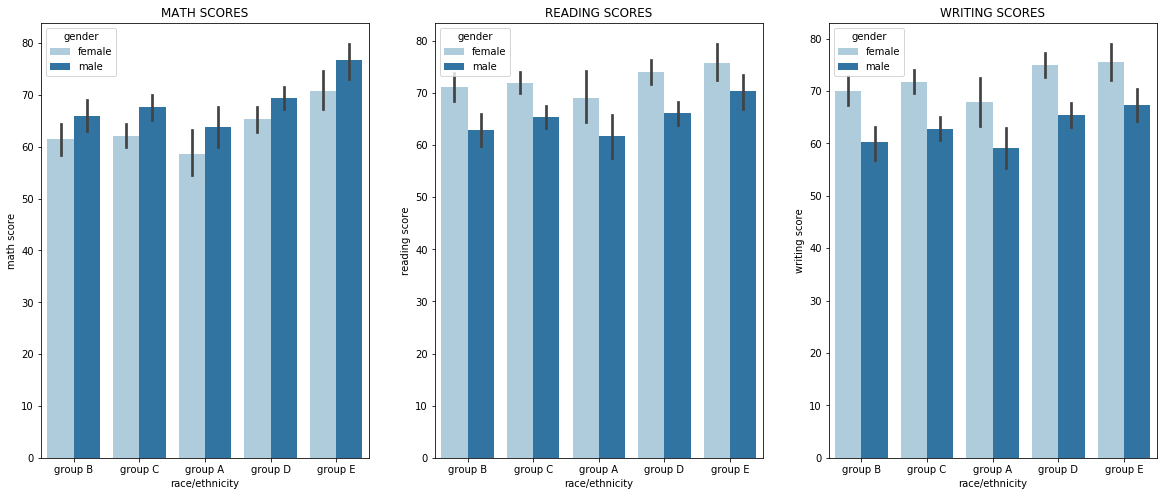

In [31]:
plt.figure(figsize=(20,8))
plt.subplot(1, 3, 1)
plt.title('MATH SCORES')
sns.barplot(x='race/ethnicity',y='math score',data=student_performance_data,hue='gender',palette='Paired')
plt.subplot(1, 3, 2)
plt.title('READING SCORES')
sns.barplot(x='race/ethnicity',y='reading score',data=student_performance_data,hue='gender',palette='Paired')
plt.subplot(1, 3, 3)
plt.title('WRITING SCORES')
sns.barplot(x='race/ethnicity',y='writing score',data=student_performance_data,hue='gender',palette='Paired')
plt.show()

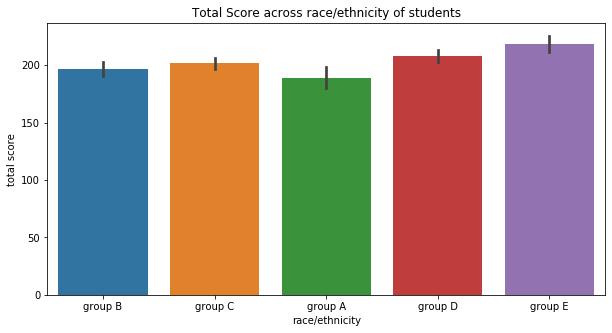

In [32]:
plt.figure(figsize=(10,5))
plt.title("Total Score across race/ethnicity of students")
sns.barplot(x=student_performance_data['race/ethnicity'],y=student_performance_data['total score'])

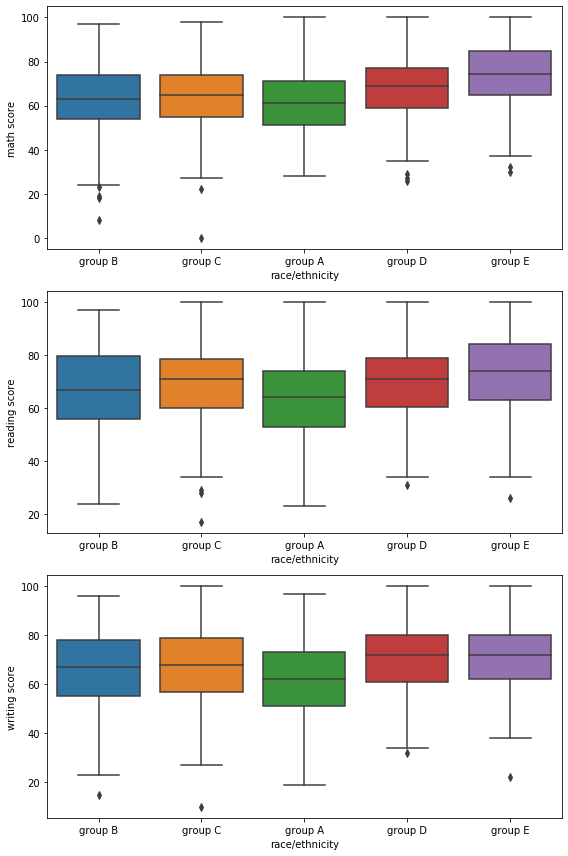

In [33]:
fig, ax = plt.subplots(3,1, figsize=(8,12))
sns.boxplot(x=student_performance_data['race/ethnicity'],y=student_performance_data['math score'],ax=ax[0])
sns.boxplot(x=student_performance_data['race/ethnicity'],y=student_performance_data['reading score'],ax=ax[1])
sns.boxplot(x=student_performance_data['race/ethnicity'],y=student_performance_data['writing score'],ax=ax[2])
plt.tight_layout()

Thus the above observation can also be noted in the above box-plots, 'group A' has a relatively poorer performance in all the three courses whereas in comparison 'group E' performs relatively better than the other groups.

#### Impact of educational background of the parents on Scores

In [34]:
#number of students having parents with various edication level
student_performance_data['parental level of education'].value_counts()


some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

Thus among the 1000 students, 226 students have parents with 'some college' background, 222 with 'associate's degree',196 have 'high school' background, 179 have parents with 'some high school' background, 118 with 'bachelor's degree',59 with 'master's degree' background. Now we will try to analyze how the performance of the students vary depending on their parents educational background.

The number of students passed across the different parental levels of education: 
some college          216
associate's degree    212
high school           178
some high school      162
bachelor's degree     114
master's degree        57
Name: parental level of education, dtype: int64


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

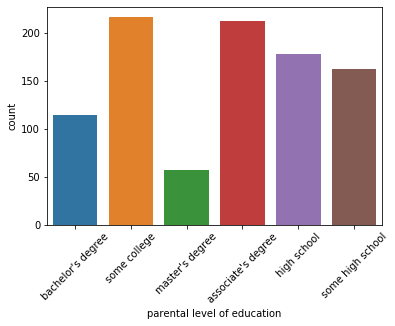

In [35]:
#number of students passed across the parental levels of education 
print("The number of students passed across the different parental levels of education: ")
print(student_performance_data['parental level of education'].loc[student_performance_data['Pass/Fail']=='P'].value_counts())
sns.countplot(student_performance_data['parental level of education'].loc[student_performance_data['Pass/Fail']=='P'])
plt.xticks(rotation = 45)

In [36]:
#to find out the percentage of students passed with the parental level of education as 'some college'
print("Percentage of students passed with the parental level of education as 'some college': {0:.2f}%"
    .format((student_performance_data[(student_performance_data['parental level of education']=='some college') & (student_performance_data['Pass/Fail']=='P')].shape[0]/student_performance_data[student_performance_data['parental level of education']=='some college'].shape[0])*100))

#to find out the percentage of students passed with the parental level of education as 'associate's degree'
print("Percentage of students passed with the parental level of education as 'associate's degree': {0:.2f}%"
    .format((student_performance_data[(student_performance_data['parental level of education']=="associate's degree") & (student_performance_data['Pass/Fail']=='P')].shape[0]/student_performance_data[student_performance_data['parental level of education']=="associate's degree"].shape[0])*100))

#to find out the percentage of students passed with the parental level of education as 'high school'
print("Percentage of students passed with the parental level of education as 'high school': {0:.2f}%"
    .format((student_performance_data[(student_performance_data['parental level of education']=="high school") & (student_performance_data['Pass/Fail']=='P')].shape[0]/student_performance_data[student_performance_data['parental level of education']=="high school"].shape[0])*100))

#to find out the percentage of students passed with the parental level of education as 'some high school'
print("Percentage of students passed with the parental level of education as 'some high school': {0:.2f}%"
    .format((student_performance_data[(student_performance_data['parental level of education']=="some high school") & (student_performance_data['Pass/Fail']=='P')].shape[0]/student_performance_data[student_performance_data['parental level of education']=="some high school"].shape[0])*100))

#to find out the percentage of students passed with the parental level of education as 'bachelor's degree'
print("Percentage of students passed with the parental level of education as 'bachelor's degree': {0:.2f}%"
    .format((student_performance_data[(student_performance_data['parental level of education']=="bachelor's degree") & (student_performance_data['Pass/Fail']=='P')].shape[0]/student_performance_data[student_performance_data['parental level of education']=="bachelor's degree"].shape[0])*100))

#to find out the percentage of students passed with the parental level of education as 'master's degree'
print("Percentage of students passed with the parental level of education as 'master's degree': {0:.2f}%"
    .format((student_performance_data[(student_performance_data['parental level of education']=="master's degree") & (student_performance_data['Pass/Fail']=='P')].shape[0]/student_performance_data[student_performance_data['parental level of education']=="master's degree"].shape[0])*100))

Percentage of students passed with the parental level of education as 'some college': 95.58%
Percentage of students passed with the parental level of education as 'associate's degree': 95.50%
Percentage of students passed with the parental level of education as 'high school': 90.82%
Percentage of students passed with the parental level of education as 'some high school': 90.50%
Percentage of students passed with the parental level of education as 'bachelor's degree': 96.61%
Percentage of students passed with the parental level of education as 'master's degree': 96.61%


Text(0, 0.5, 'Number of students')

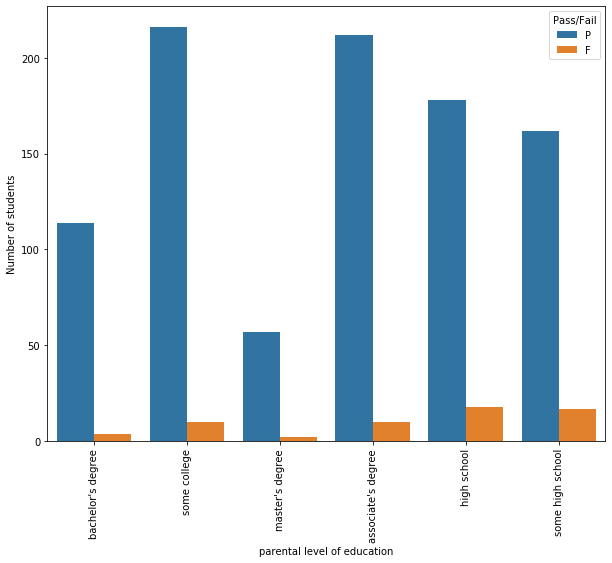

In [37]:
plt.figure(figsize= (10,8))
sns.countplot(student_performance_data['parental level of education'],hue=student_performance_data['Pass/Fail'])
plt.xticks(rotation=90)
plt.ylabel('Number of students')

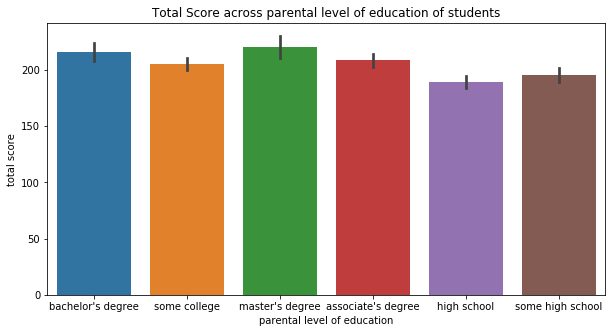

In [38]:
plt.figure(figsize=(10,5))
plt.title("Total Score across parental level of education of students")
sns.barplot(x=student_performance_data['parental level of education'],y=student_performance_data['total score'])

As can be observed from the above plot that there is some influence the parent's background have on the student's performance. As can be seen, that students having parents with master's degree performed better than other and students with parents having some high school level of education performed poorer than the other groups.

#### Impact of quality of lunch on Scores

In [39]:
#number of students having 'standard' lunch vs. number of students having 'free/reduced' lunch
student_performance_data['lunch'].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

Thus out of the 1000 students, 645 have a standard lunch and 355 have a free/reduced lunch. Now we will analyze how the type of lunch varies the performance of the students.

In [40]:
#number of students passed across the type of lunch 
student_performance_data['lunch'].loc[student_performance_data['Pass/Fail']=='P'].value_counts()

standard        629
free/reduced    310
Name: lunch, dtype: int64

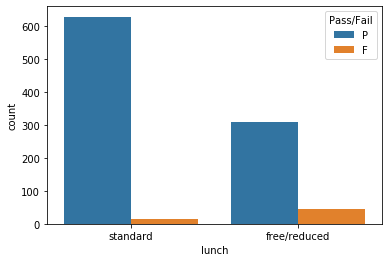

In [41]:
sns.countplot(student_performance_data['lunch'],hue=student_performance_data['Pass/Fail'])

In [42]:
#to find out the percentage of students passed with the lunch type as 'standard'
print("Percentage of students passed with the lunch type as 'standard': {0:.2f}%"
    .format((student_performance_data[(student_performance_data['lunch']=='standard') & (student_performance_data['Pass/Fail']=='P')].shape[0]/student_performance_data[student_performance_data['lunch']=='standard'].shape[0])*100))

#to find out the percentage of students passed with the lunch type as 'free/reduced'
print("Percentage of students passed with the lunch type as 'free/reduced': {0:.2f}%"
    .format((student_performance_data[(student_performance_data['lunch']=="free/reduced") & (student_performance_data['Pass/Fail']=='P')].shape[0]/student_performance_data[student_performance_data['lunch']=="free/reduced"].shape[0])*100))

Percentage of students passed with the lunch type as 'standard': 97.52%
Percentage of students passed with the lunch type as 'free/reduced': 87.32%


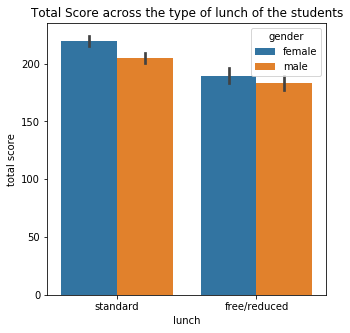

In [43]:
plt.figure(figsize=(5,5))
plt.title("Total Score across the type of lunch of the students")
sns.barplot(x=student_performance_data['lunch'],y=student_performance_data['total score'],hue=student_performance_data['gender'])

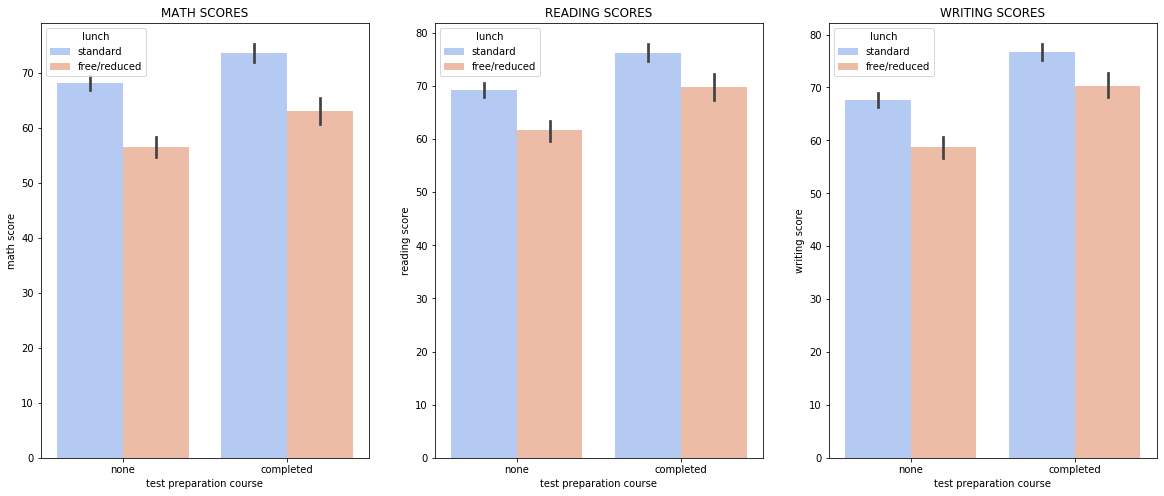

In [44]:
plt.figure(figsize=(20,8))
plt.subplot(1, 3, 1)
sns.barplot(x='test preparation course',y='math score',data=student_performance_data,hue='lunch',palette='coolwarm')
plt.title('MATH SCORES')
plt.subplot(1, 3, 2)
sns.barplot(x='test preparation course',y='reading score',data=student_performance_data,hue='lunch',palette='coolwarm')
plt.title('READING SCORES')
plt.subplot(1, 3, 3)
sns.barplot(x='test preparation course',y='writing score',data=student_performance_data,hue='lunch',palette='coolwarm')
plt.title('WRITING SCORES')
plt.show()

So as we can observe from the above plot, the type of lunch has an impact on the scores of the students. The students with 'standard' lunch performed better than the student with 'free/reduced' lunch.

#### Impact of completing the 'Test Preparation Course' on Scores

In [45]:
#number of students who completed the 'Test preparation course' vs. the students who didn't complete the course
student_performance_data['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

Thus out of the 1000 students, 642 students didn't complete the 'Test preparation course' and 358 students completed it.

In [46]:
#number of students passed across the status of completion of the test preparation course 
print("The number of students passed across the status of completion of the test preparation course:")
print(student_performance_data['test preparation course'].loc[student_performance_data['Pass/Fail']=='P'].value_counts())

The number of students passed across the status of completion of the test preparation course:
none         591
completed    348
Name: test preparation course, dtype: int64


In [47]:
#to find out the percentage of students passed with the test preparation course status as 'none'
print("Percentage of students passed with the test preparation course status as 'none': {0:.2f}%"
    .format((student_performance_data[(student_performance_data['test preparation course']=='none') & (student_performance_data['Pass/Fail']=='P')].shape[0]/student_performance_data[student_performance_data['test preparation course']=='none'].shape[0])*100))

#to find out the percentage of students passed with the test preparation course status as 'completed'
print("Percentage of students passed with the test preparation course status as 'completed': {0:.2f}%"
    .format((student_performance_data[(student_performance_data['test preparation course']=="completed") & (student_performance_data['Pass/Fail']=='P')].shape[0]/student_performance_data[student_performance_data['test preparation course']=="completed"].shape[0])*100))

Percentage of students passed with the test preparation course status as 'none': 92.06%
Percentage of students passed with the test preparation course status as 'completed': 97.21%


Text(0.5, 0, 'Status of Test Prep Course')

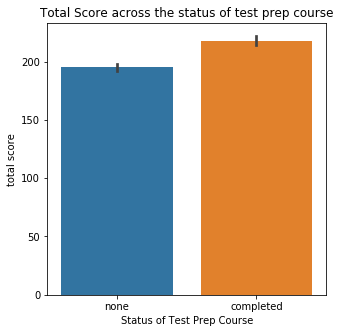

In [48]:
plt.figure(figsize=(5,5))
sns.barplot(x=student_performance_data['test preparation course'],y=student_performance_data['total score'])
plt.title("Total Score across the status of test prep course")
plt.xlabel('Status of Test Prep Course')

As can be noted that the test preparation course has an impact on the performance of the students, 97.21% of the students who completed the 'Test Preparation Course'passed whereas 92.06% of the students who didn't complete 'Test Preparation Course' passed.

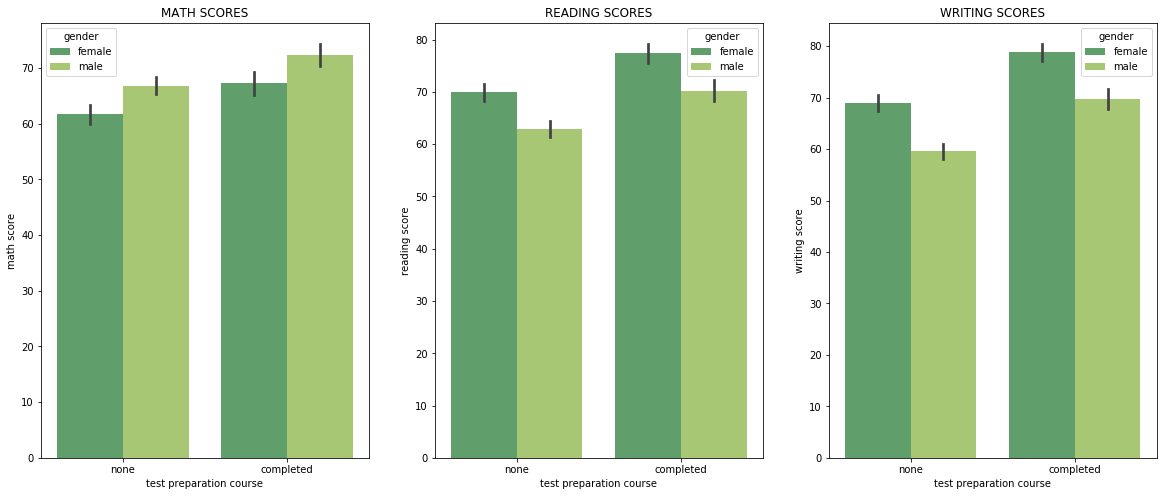

In [49]:
plt.figure(figsize=(20,8))
plt.subplot(1, 3, 1)
sns.barplot(x='test preparation course',y='math score',data=student_performance_data,hue='gender',palette='summer')
plt.title('MATH SCORES')
plt.subplot(1, 3, 2)
sns.barplot(x='test preparation course',y='reading score',data=student_performance_data,hue='gender',palette='summer')
plt.title('READING SCORES')
plt.subplot(1, 3, 3)
sns.barplot(x='test preparation course',y='writing score',data=student_performance_data,hue='gender',palette='summer')
plt.title('WRITING SCORES')
plt.show()

From the first plot we can see the math scores of boys are better irrespective of wether they completed the course or no.<br>
From the next two plots we can see that girls perform more better in reading and writing.<br>
From all three graphs its clear that if the course is completed we can achieve higher scores<br>

## Grouping Operations

Number of Girl Students Scoring 90 in all the Subjects

In [50]:
student_performance_data[(student_performance_data['gender'] == 'female') &
     (student_performance_data['math score'] > 90) & 
     (student_performance_data['writing score'] > 90) &
     (student_performance_data['reading score'] > 90)]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,Pass/Fail
114,female,group E,bachelor's degree,standard,completed,99,100,100,299,P
165,female,group C,bachelor's degree,standard,completed,96,100,100,296,P
179,female,group D,some high school,standard,completed,97,100,100,297,P
451,female,group E,some college,standard,none,100,92,97,289,P
458,female,group E,bachelor's degree,standard,none,100,100,100,300,P
546,female,group A,some high school,standard,completed,92,100,97,289,P
566,female,group E,bachelor's degree,free/reduced,completed,92,100,100,292,P
594,female,group C,bachelor's degree,standard,completed,92,100,99,291,P
685,female,group E,master's degree,standard,completed,94,99,100,293,P
712,female,group D,some college,standard,none,98,100,99,297,P


Lets compare the scores secured by Boys and Girls

In [51]:
student_performance_data.groupby(['gender']).agg(['min','median','max'])

math score             reading score             writing score         \
              min median  max           min median  max           min median   
gender                                                                         
female          0     65  100            17     73  100            10     74   
male           27     69  100            23     66  100            15     64   

            total score              
        max         min median  max  
gender                               
female  100          27    211  300  
male    100          69    199  300

Lets check the Effect of Lunch on Student's Performance

In [52]:
student_performance_data[['lunch','gender','math score','writing score','reading score']].groupby(['lunch','gender']).agg('median')

math score  writing score  reading score
lunch        gender                                          
free/reduced female        57.0           68.0           67.0
             male          62.0           59.0           61.0
standard     female        67.0           76.0           75.0
             male          72.0           67.0           67.5

Lets check the Effect of Test Preparation Course on Scores

In [53]:
student_performance_data[['test preparation course',
      'gender',
      'math score',
      'writing score',
      'reading score']].groupby(['test preparation course','gender']).agg('median')

math score  writing score  reading score
test preparation course gender                                          
completed               female          67             79             78
                        male            73             70             71
none                    female          62             70             71
                        male            67             60             63

Lets check the Effect of Race and Ethnicity on Student's Performance

In [54]:
student_performance_data[['race/ethnicity',
      'math score',
      'writing score',
      'reading score']].groupby(['race/ethnicity']).agg('median')


,math score,writing score,reading score
race/ethnicity,,,
group A,61.0,62.0,64.0
group B,63.0,67.0,67.0
group C,65.0,68.0,71.0
group D,69.0,72.0,71.0
group E,74.5,72.0,74.0


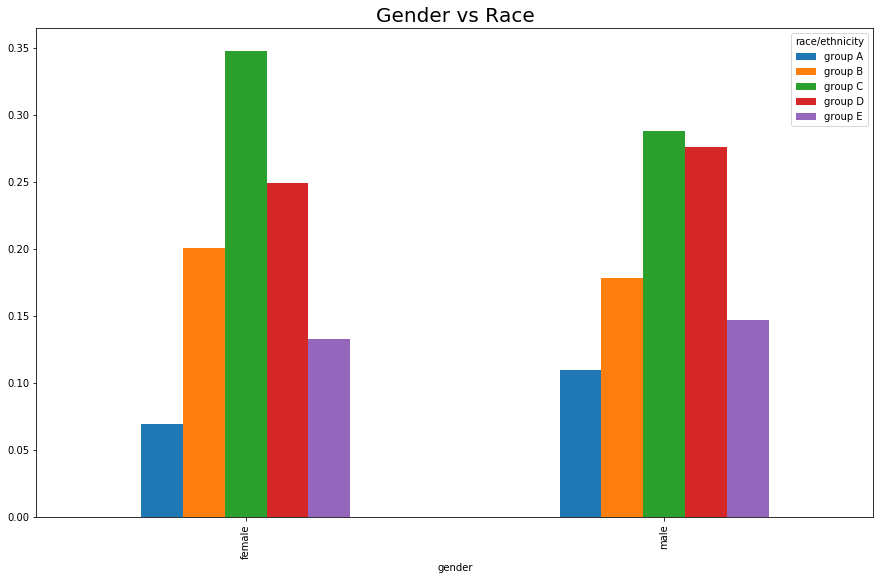

In [55]:
# gender vs race/etnicity 

plt.rcParams['figure.figsize'] = (15, 9)
x = pd.crosstab(student_performance_data['gender'], student_performance_data['race/ethnicity'])
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = False)
plt.title('Gender vs Race', fontweight = 30, fontsize = 20)
plt.show()


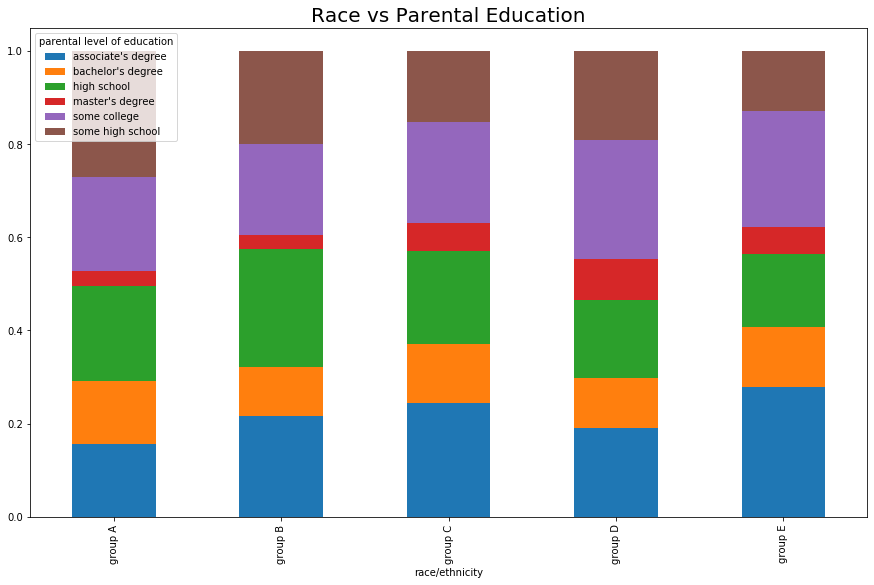

In [56]:
# comparison of race/ethnicity and parental level of education

plt.rcParams['figure.figsize'] = (15, 9)
x = pd.crosstab(student_performance_data['race/ethnicity'], student_performance_data['parental level of education'])
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = 'True')
plt.title('Race vs Parental Education', fontweight = 30, fontsize = 20)
plt.show()

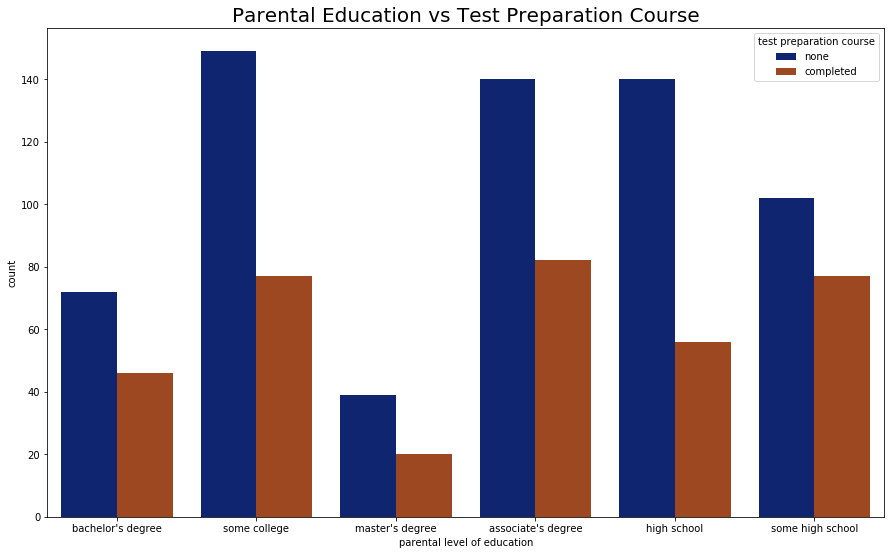

In [57]:
# comparison of parental degree and test course

plt.rcParams['figure.figsize'] = (15, 9)
sns.countplot(x = 'parental level of education', data = student_performance_data, hue = 'test preparation course', palette = 'dark')
plt.title('Parental Education vs Test Preparation Course', fontweight = 30, fontsize = 20)
plt.show()

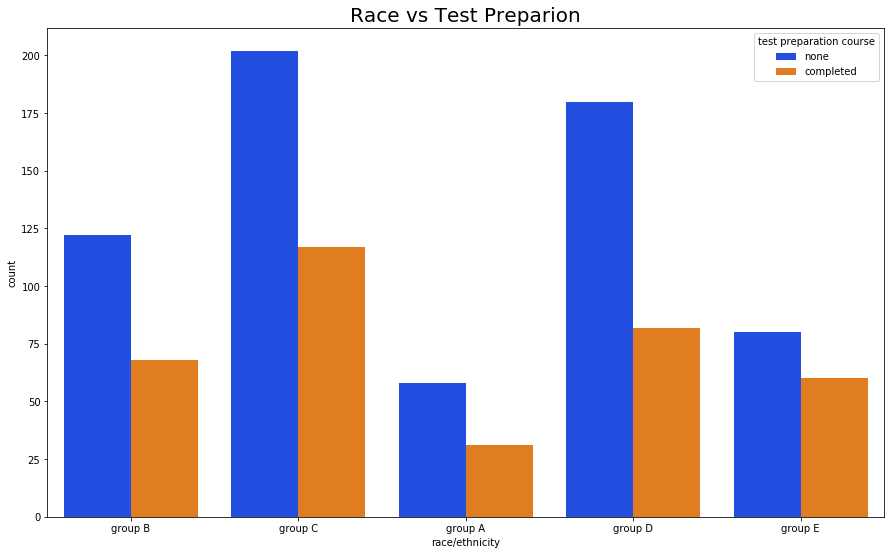

In [58]:
# comparison of race/ethnicity and test preparation course

sns.countplot(x = 'race/ethnicity', data = student_performance_data,  hue = 'test preparation course', palette = 'bright')
plt.title('Race vs Test Preparion', fontweight = 30, fontsize = 20)
plt.show()

### Distribution of Scores

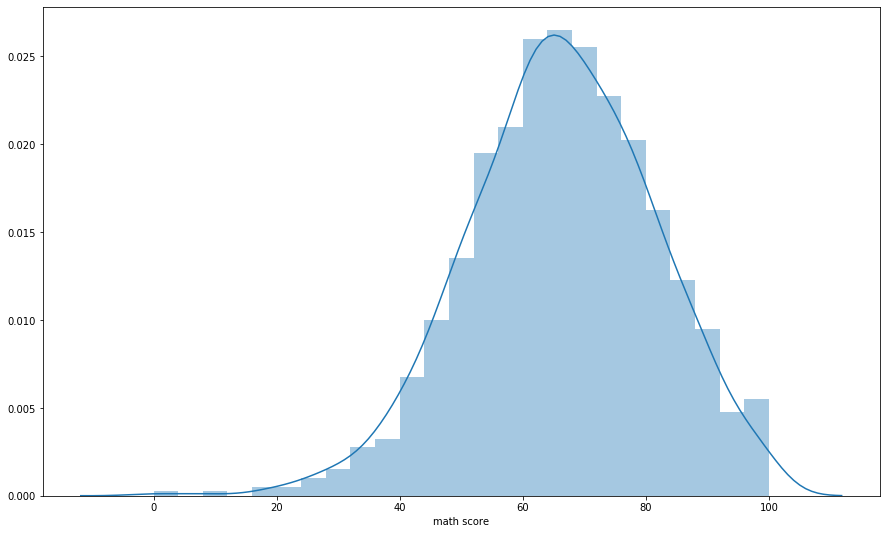

In [59]:
sns.distplot(student_performance_data['math score'])

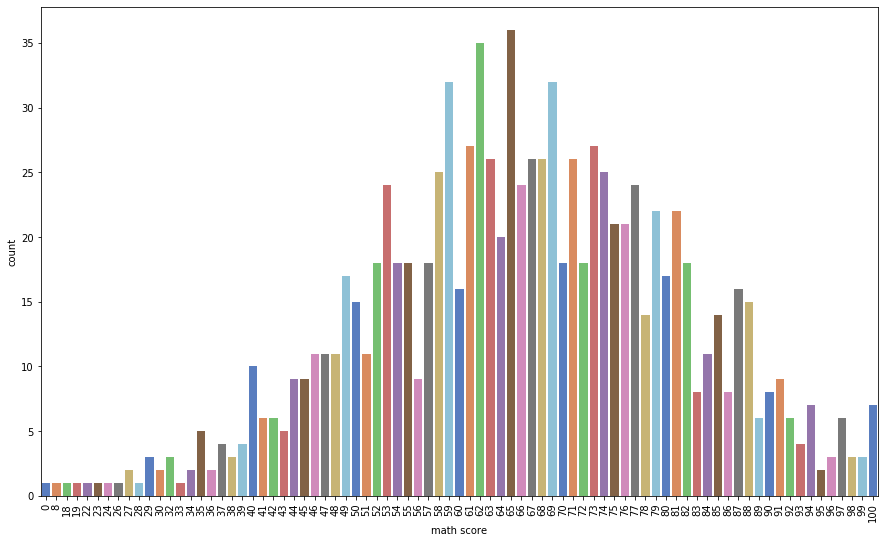

In [60]:
p = sns.countplot(x="math score", data = student_performance_data, palette="muted")
_ = plt.setp(p.get_xticklabels(), rotation=90) 

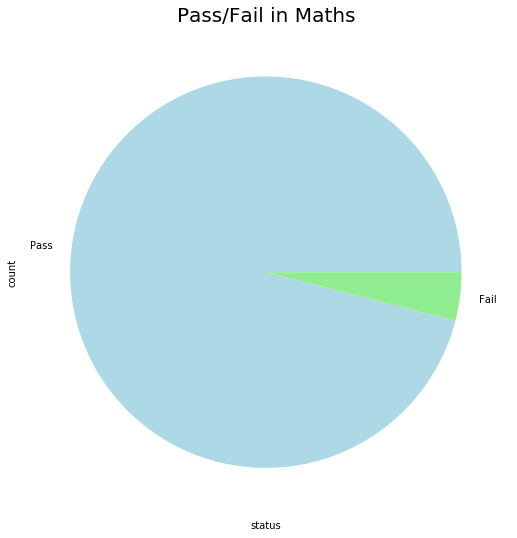

In [61]:
# feature engineering on the data to visualize and solve the dataset more accurately

# setting a passing mark for the students to pass on the three subjects individually
passmarks = 40

# creating a new column pass_math, this column will tell us whether the students are pass or fail
student_performance_data['pass_math'] = np.where(student_performance_data['math score']< passmarks, 'Fail', 'Pass')
student_performance_data['pass_math'].value_counts().plot.pie(colors = ['lightblue', 'lightgreen'])

plt.title('Pass/Fail in Maths', fontweight = 30, fontsize = 20)
plt.xlabel('status')
plt.ylabel('count')
plt.show()

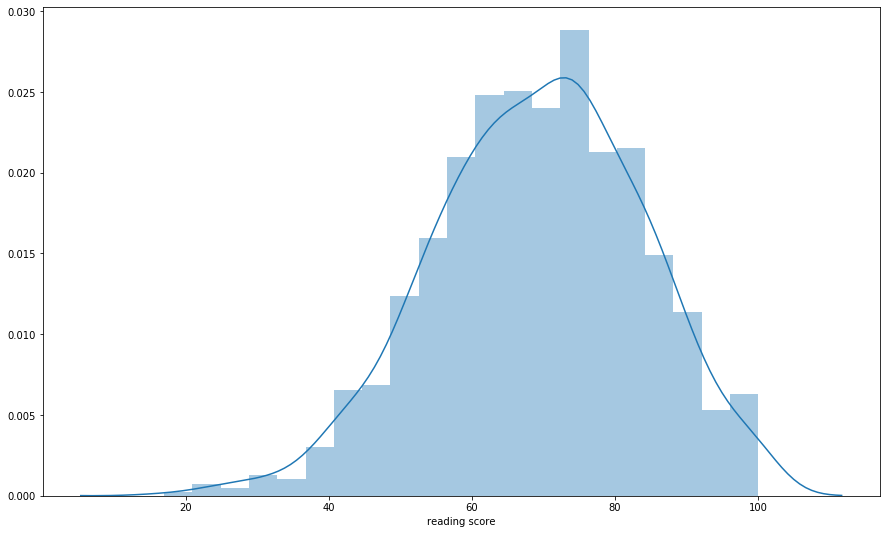

In [62]:
sns.distplot(student_performance_data['reading score'])

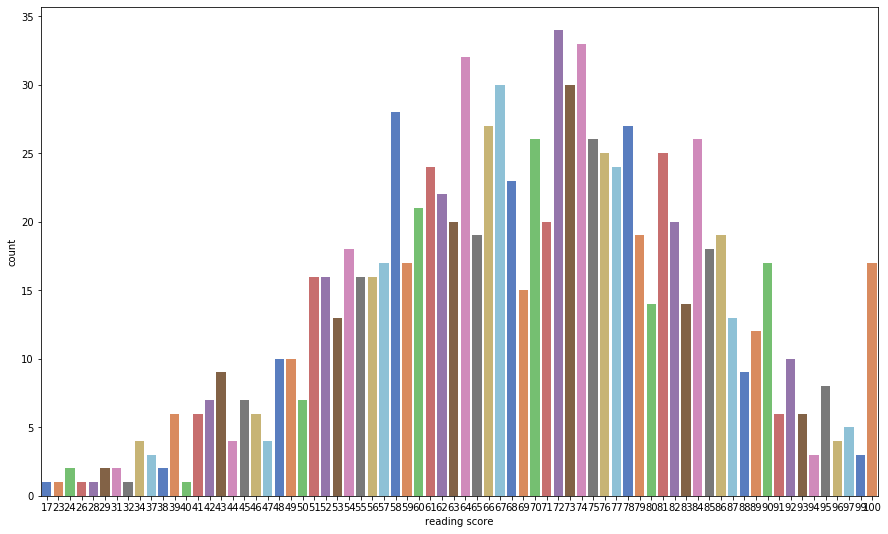

In [63]:
sns.countplot(x="reading score", data = student_performance_data, palette="muted")
plt.show()

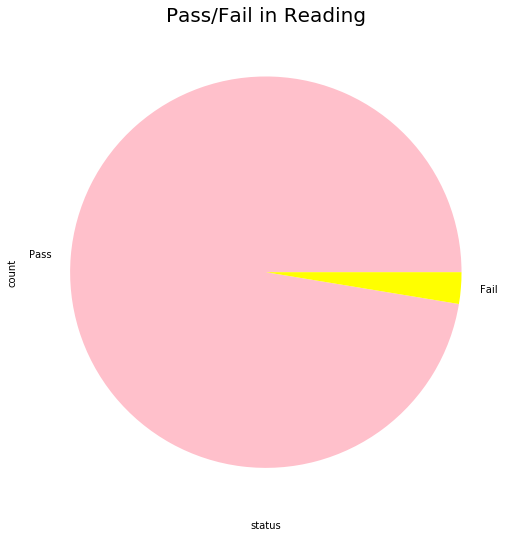

In [64]:
# creating a new column pass_reading, this column will tell us whether the students are pass or fail

student_performance_data['pass_reading'] = np.where(student_performance_data['reading score']< passmarks, 'Fail', 'Pass')
student_performance_data['pass_reading'].value_counts(dropna = False).plot.pie(colors = ['pink', 'yellow'])

plt.title('Pass/Fail in Reading', fontweight = 30, fontsize = 20)
plt.xlabel('status')
plt.ylabel('count')
plt.show()

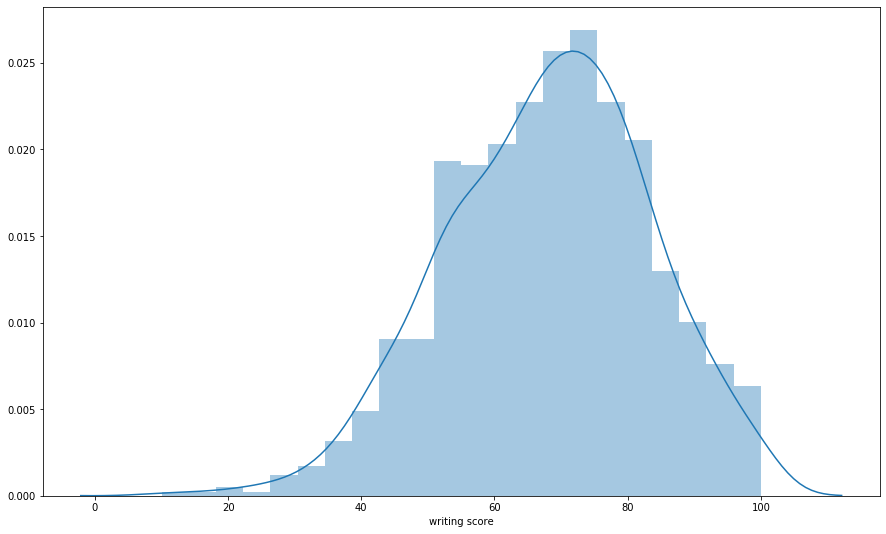

In [65]:
sns.distplot(student_performance_data['writing score'])

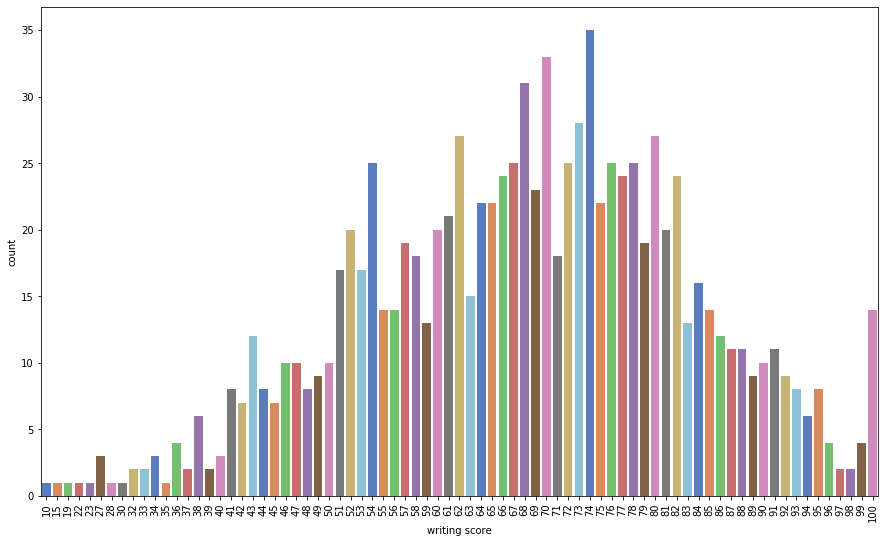

In [66]:
p = sns.countplot(x="writing score", data = student_performance_data, palette="muted")
_ = plt.setp(p.get_xticklabels(), rotation=90) 

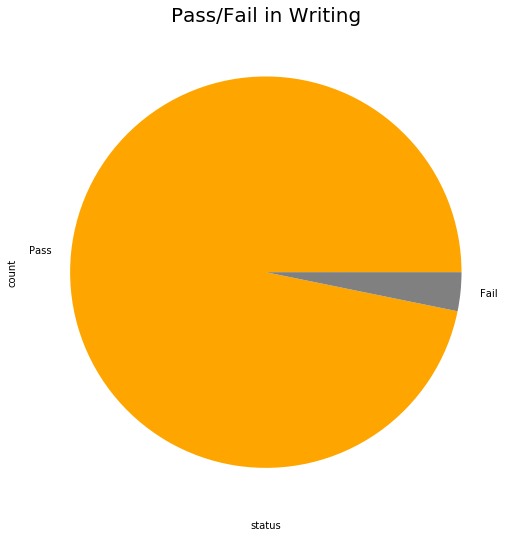

In [67]:
# creating a new column pass_writing, this column will tell us whether the students are pass or fail

student_performance_data['pass_writing'] = np.where(student_performance_data['writing score']< passmarks, 'Fail', 'Pass')
student_performance_data['pass_writing'].value_counts(dropna = False).plot.pie(colors = ['orange', 'gray'])

plt.title('Pass/Fail in Writing', fontweight = 30, fontsize = 20)
plt.xlabel('status')
plt.ylabel('count')
plt.show()


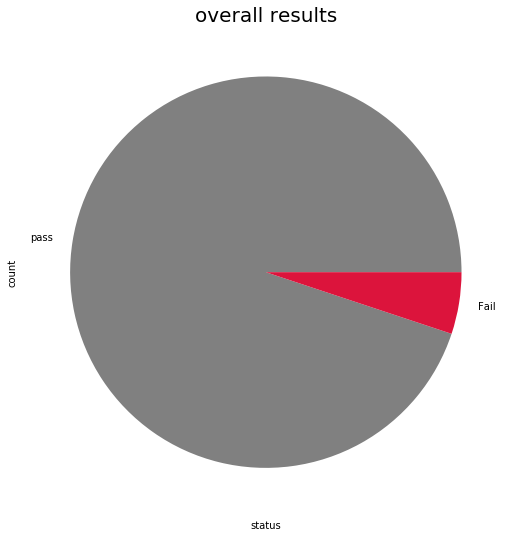

In [68]:
# checking which student is fail overall

student_performance_data['status'] = student_performance_data.apply(lambda x : 'Fail' if x['pass_math'] == 'Fail' or 
                           x['pass_reading'] == 'Fail' or x['pass_writing'] == 'Fail'
                           else 'pass', axis = 1)

student_performance_data['status'].value_counts(dropna = False).plot.pie(colors = ['grey', 'crimson'])
plt.title('overall results', fontweight = 30, fontsize = 20)
plt.xlabel('status')
plt.ylabel('count')
plt.show()

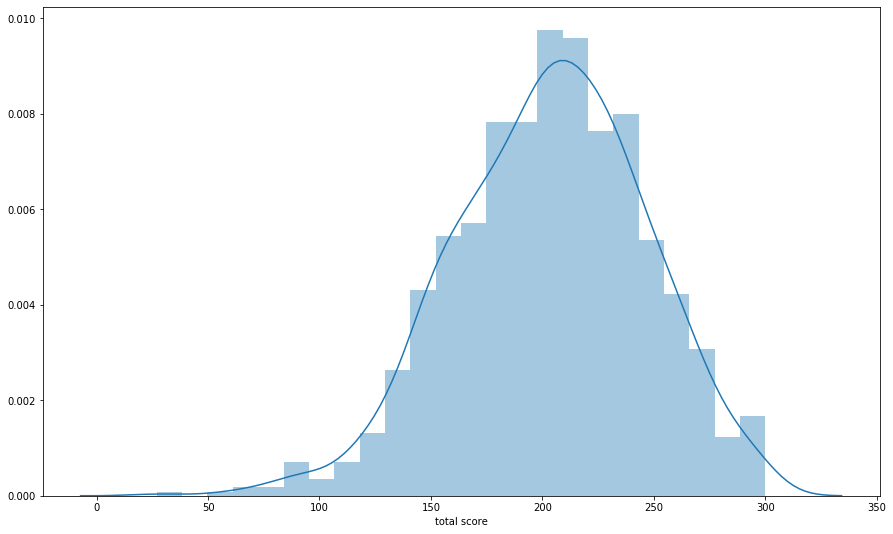

In [69]:
sns.distplot(student_performance_data['total score'])

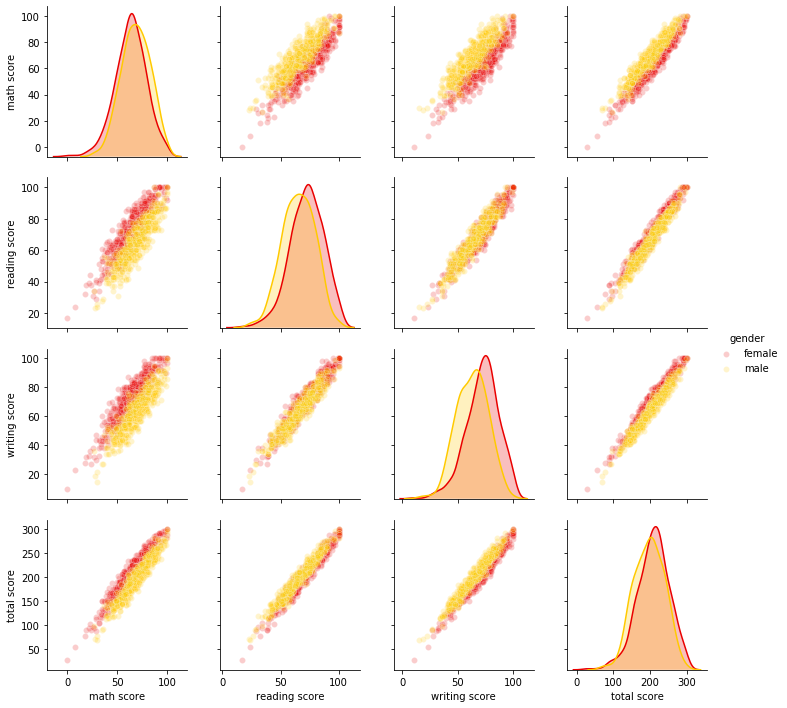

In [70]:
sns.pairplot(data=student_performance_data,hue='gender',plot_kws={'alpha':0.2},palette='hot')

From the above plot it is clear that all the scores increase linearly with each other.

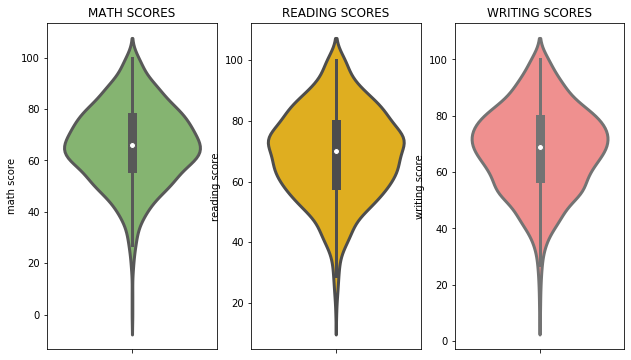

In [71]:
plt.figure(figsize=(14,6))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=student_performance_data,palette='summer',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=student_performance_data,palette='Wistia_r',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=student_performance_data,palette='spring',linewidth=3)
plt.show()

From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

### Inferential Statistics

Lets check the Probability of Students Scoring More than 50 Marks in Maths

In [72]:
total_students = student_performance_data.shape[0]
students_score_more_than_50 = student_performance_data[student_performance_data['math score'] > 50].shape[0]

probability_of_students_scoring_more_than_50_in_maths = (students_score_more_than_50/total_students)*100
print("Probability of Students Scoring more than 50 marks in Maths :", probability_of_students_scoring_more_than_50_in_maths)

Probability of Students Scoring more than 50 marks in Maths : 85.0


In [73]:
total_students = student_performance_data.shape[0]
students_score_more_than_50 =student_performance_data[student_performance_data['reading score'] > 50].shape[0]

probability_of_students_scoring_more_than_50_in_reading = (students_score_more_than_50/total_students)*100
print("Probability of Students Scoring more than 50 marks in Reading :", probability_of_students_scoring_more_than_50_in_reading)

Probability of Students Scoring more than 50 marks in Reading : 90.3


In [74]:
total_students = student_performance_data.shape[0]
students_score_more_than_50 =student_performance_data[student_performance_data['writing score'] > 50].shape[0]

probability_of_students_scoring_more_than_50_in_writing = (students_score_more_than_50/total_students)*100
print("Probability of Students Scoring more than 50 marks in Writing :", probability_of_students_scoring_more_than_50_in_writing)

Probability of Students Scoring more than 50 marks in Writing : 87.6


Lets also check the Probability of Students Passing in all the three Subjects

In [75]:
total_students = student_performance_data.shape[0]
number_of_students_passing_in_all_subjects = student_performance_data[(student_performance_data['math score'] > 40) &
                                                  (student_performance_data['writing score'] > 40) & 
                                                  (student_performance_data['reading score'] > 40)].shape[0]
probability_of_students_passing_in_all_the_subjects = (number_of_students_passing_in_all_subjects/total_students)*100
print("The Probability of Students Passing in all the Subjects is {0:.2f} %".format(probability_of_students_passing_in_all_the_subjects))

The Probability of Students Passing in all the Subjects is 93.90 %


Lets also check the Probability of Students Scoring more than 90 in all the three Subjects

In [76]:
total_students = student_performance_data.shape[0]
number_of_students_scoring_more_than_90 = student_performance_data[(student_performance_data['math score'] > 90) &
                                                  (student_performance_data['writing score'] > 90) & 
                                                  (student_performance_data['reading score'] > 90)].shape[0]

probability_of_students_scoring_more_than_90_in_all_subjects = (number_of_students_scoring_more_than_90/total_students)*100
print("The Probability of Students Passing in all the Subjects is {0:.2f} %".
      format(probability_of_students_scoring_more_than_90_in_all_subjects))

The Probability of Students Passing in all the Subjects is 2.30 %


Checking for Skewness for the Maths, Reading and Writing Scores

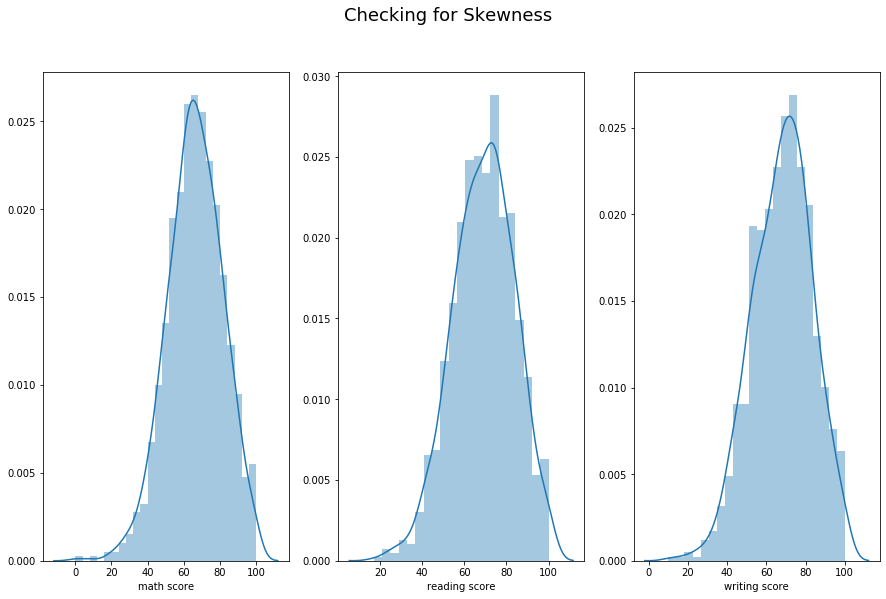

In [77]:
plt.subplot(1, 3, 1)
sns.distplot(student_performance_data['math score'])

plt.subplot(1, 3, 2)
sns.distplot(student_performance_data['reading score'])

plt.subplot(1, 3, 3)
sns.distplot(student_performance_data['writing score'])

plt.suptitle('Checking for Skewness', fontsize = 18)
plt.show()

It is very much clear, that there is no skewness in the Target Columns,

Lets check the Inference

In [78]:
# lets take seed so that everytime the random values come out to be constant
np.random.seed(6)

# lets take 100 sample values from the dataset of 1000 values
sample_math_marks = np.random.choice(a= student_performance_data['math score'], size=100)

# getting the sample mean
print ("Sample mean for Math Scores:", sample_math_marks.mean() )          

# getting the population mean
print("Population mean for Math Scores:", student_performance_data['math score'].mean())

# lets take 100 sample values from the dataset of 1000 values
sample_reading_marks = np.random.choice(a= student_performance_data['reading score'], size=100)

# getting the sample mean
print ("\nSample mean for Reading Scores:", sample_reading_marks.mean() )          

# getting the population mean
print("Population mean for Reading Scores:", student_performance_data['reading score'].mean())

# lets take 100 sample values from the dataset of 1000 values
sample_writing_marks = np.random.choice(a=student_performance_data['writing score'], size=100)

# getting the sample mean
print ("\nSample mean for Writing Scores:", sample_math_marks.mean() )          

# getting the population mean
print("Population mean for Writing Scores:", student_performance_data['writing score'].mean())

Sample mean for Math Scores: 63.12
Population mean for Math Scores: 66.089

Sample mean for Reading Scores: 68.5
Population mean for Reading Scores: 69.169

Sample mean for Writing Scores: 63.12
Population mean for Writing Scores: 68.054


### Correlation between the 4 scores

In [79]:
#Correlation among numeric columns
student_performance_data.corr()

,math score,reading score,writing score,total score
math score,1.000000,0.817580,0.802642,0.918746
reading score,0.817580,1.000000,0.954598,0.970331
writing score,0.802642,0.954598,1.000000,0.965667
total score,0.918746,0.970331,0.965667,1.000000


This shows the students scoring good in one subject, score good overall (in all the subjects)

Text(0.5, 1, 'Covariance Plot')

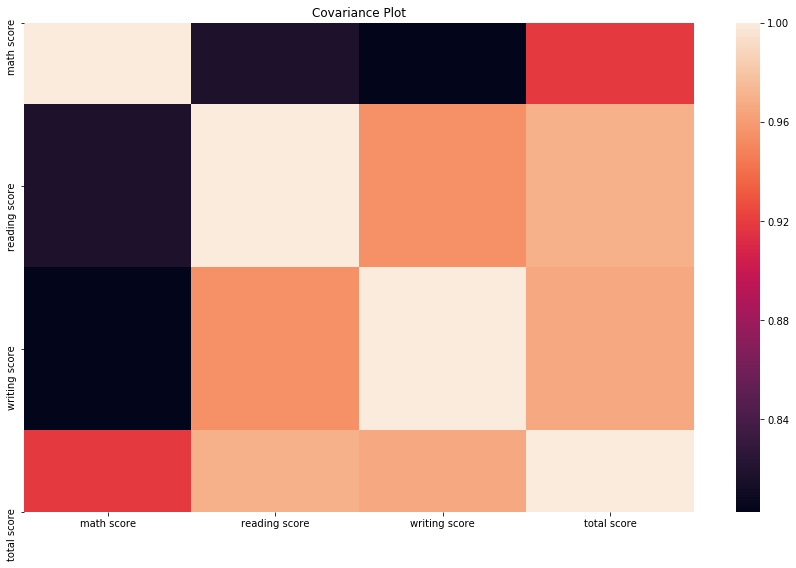

In [80]:
sns.heatmap(student_performance_data.corr())
plt.title('Covariance Plot')

As can be observed from the above Covariance plot that there is a strong correlation between 'reading score' and 'writing score'. The 'math score' is also correlated with the 'reading score' and 'writing score'

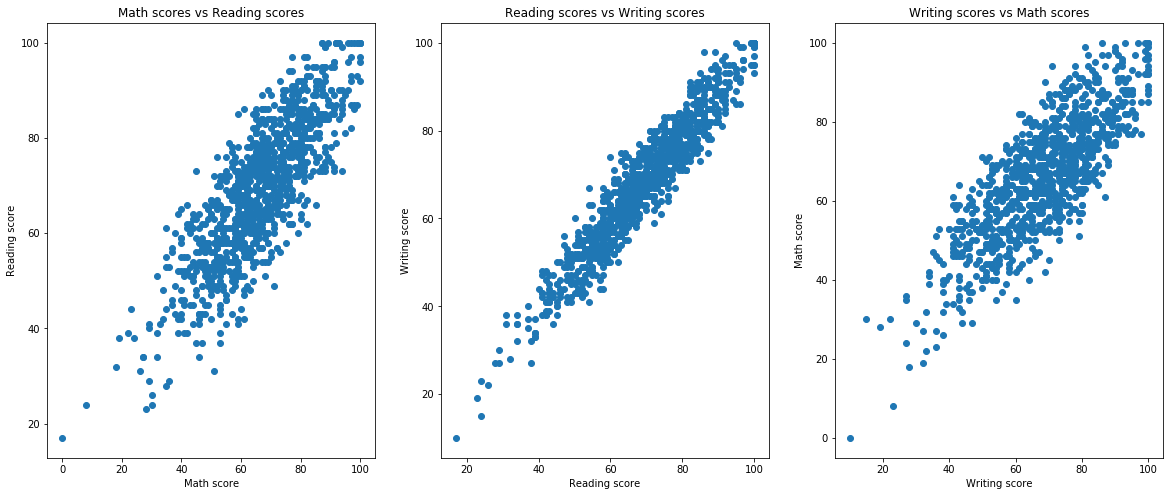

In [81]:
#Scatter plot of scores in different subjects to visualize correlation among them
plt.figure(figsize = (20,8))

plt.subplot(1,3,1)
plt.scatter(student_performance_data['math score'],student_performance_data['reading score'])
plt.title('Math scores vs Reading scores')
plt.xlabel('Math score')
plt.ylabel('Reading score')

plt.subplot(1,3,2)
plt.scatter(student_performance_data['reading score'],student_performance_data['writing score'])
plt.title('Reading scores vs Writing scores')
plt.xlabel('Reading score')
plt.ylabel('Writing score')

plt.subplot(1,3,3)
plt.scatter(student_performance_data['writing score'],student_performance_data['math score'])
plt.title('Writing scores vs Math scores')
plt.xlabel('Writing score')
plt.ylabel('Math score')

plt.show()

There is a strong correlation between the scores.The plot shows the same observation as seen from calculating correlation among scores in different subjects. Also reading vs writing scatter plot is much more dense than reading vs maths or writing vs maths which shows higher correalation among them - students better in reading(or writing) are better in writing(or reading).

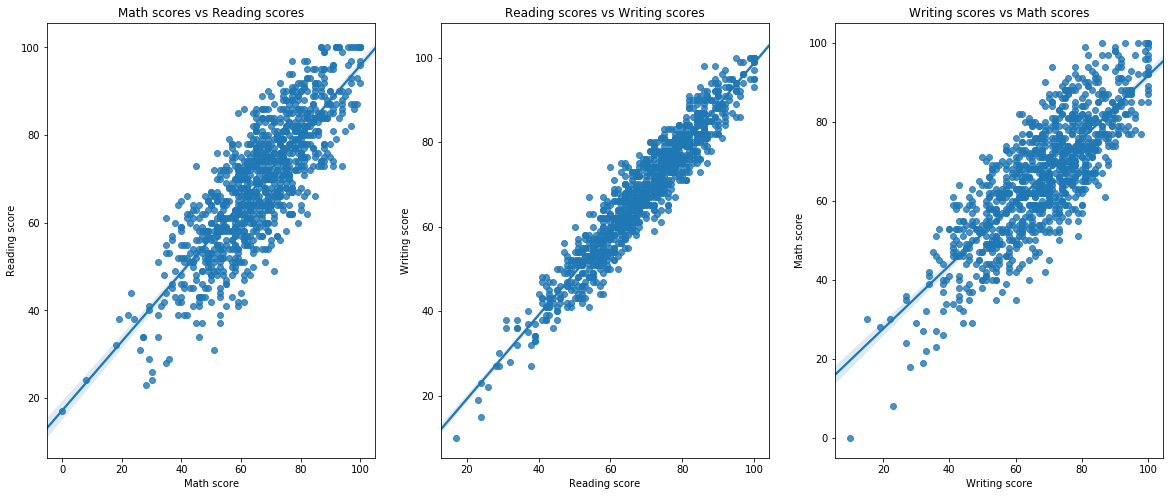

In [82]:
#Same plot as above but with regression line using Seaborn
plt.figure(figsize = (20,8))

plt.subplot(1,3,1)
sns.regplot(x = 'math score', y = 'reading score',data = student_performance_data)
plt.title('Math scores vs Reading scores')
plt.xlabel('Math score')
plt.ylabel('Reading score')

plt.subplot(1,3,2)
sns.regplot(x = 'reading score', y = 'writing score',data = student_performance_data)
plt.title('Reading scores vs Writing scores')
plt.xlabel('Reading score')
plt.ylabel('Writing score')

plt.subplot(1,3,3)
sns.regplot(x = 'writing score', y = 'math score',data = student_performance_data)
plt.title('Writing scores vs Math scores')
plt.xlabel('Writing score')
plt.ylabel('Math score')

plt.show()

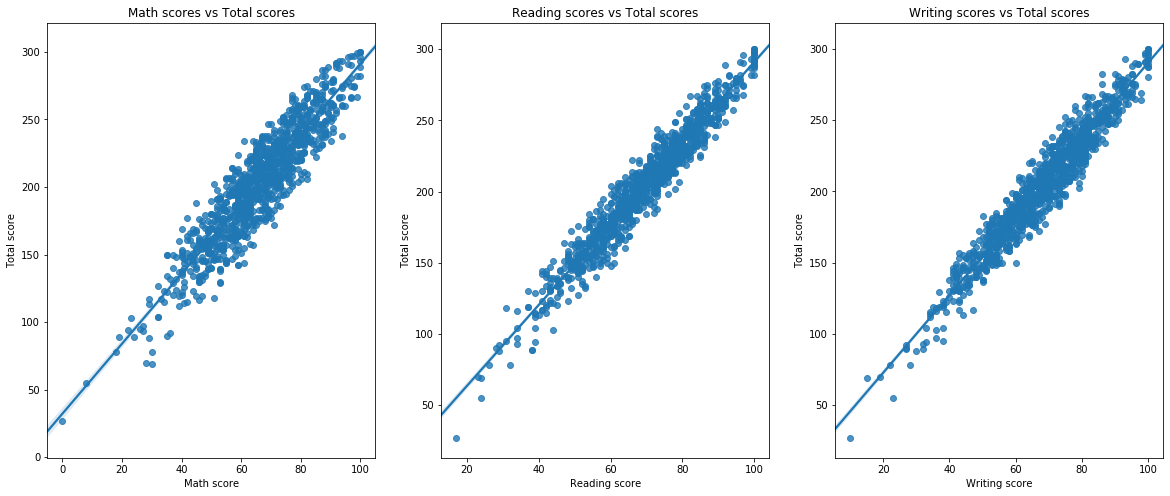

In [83]:
#Scatter plot between individiual subject score and total score with using Seaborn
plt.figure(figsize = (20,8))

plt.subplot(1,3,1)
sns.regplot(x = 'math score', y = 'total score',data = student_performance_data)
plt.title('Math scores vs Total scores')
plt.xlabel('Math score')
plt.ylabel('Total score')

plt.subplot(1,3,2)
sns.regplot(x = 'reading score', y = 'total score',data = student_performance_data)
plt.title('Reading scores vs Total scores')
plt.xlabel('Reading score')
plt.ylabel('Total score')

plt.subplot(1,3,3)
sns.regplot(x = 'writing score', y = 'total score',data = student_performance_data)
plt.title('Writing scores vs Total scores')
plt.xlabel('Writing score')
plt.ylabel('Total score')

plt.show()

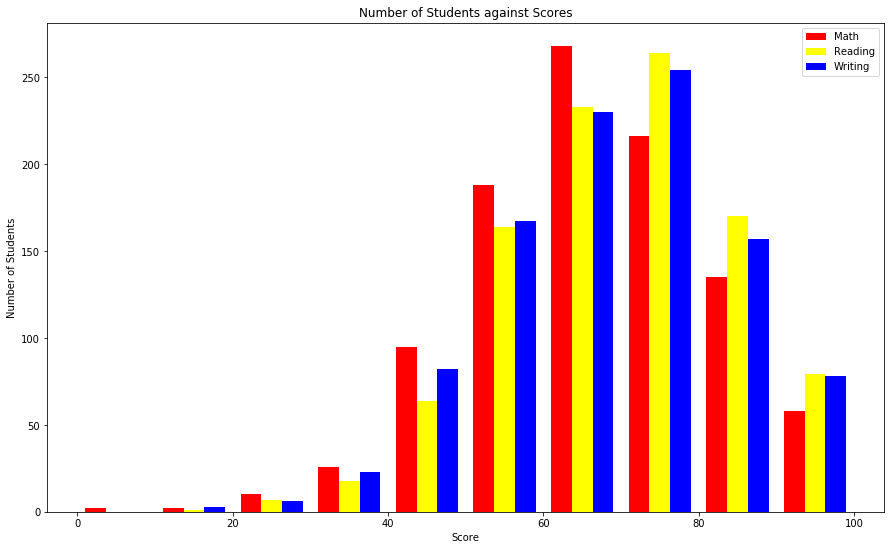

In [84]:
#Number of Students against Scores in all the 3 subjects
plt.hist([student_performance_data['math score'],student_performance_data['reading score'],student_performance_data['writing score']], color=['red', 'yellow', 'blue'])
plt.title('Number of Students against Scores')
plt.xlabel('Score')
plt.ylabel('Number of Students')
plt.legend(['Math', 'Reading', 'Writing'])
plt.show()

Number of students with higher score in mathematics have dropped below than reading and writing which may show that is easier to get a higher score in reading and writing than mathematics.

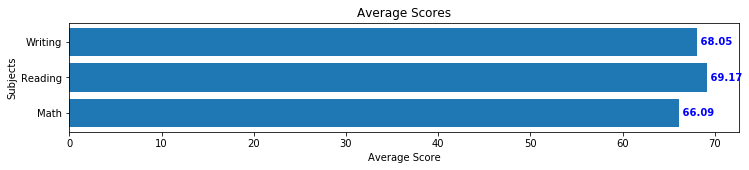

In [85]:
y = ['Math','Reading','Writing']
width = [student_performance_data['math score'].mean(),student_performance_data['reading score'].mean(),student_performance_data['writing score'].mean()]

plt.figure(figsize = (12,2))
plt.barh(y = y, 
         width = width)
plt.title('Average Scores')
plt.xlabel('Average Score')
plt.ylabel('Subjects')
for i,v in enumerate(width):
    plt.text(v, i, " "+str(round(v,2)), color='blue', va='center', fontweight='bold')
plt.show()

Average score is highest in reading and lowest in mathematics.

So as we have analysed the impact of different features on the student's performance and we observed that factors like 'gender', 'race/ethinicty', 'lunch', 'test preparation course' and 'parental level of education' impacted the scores obtained by the students.

#### Find the percentage of marks

In [86]:
student_performance_data['percentage'] = student_performance_data['total score']/3

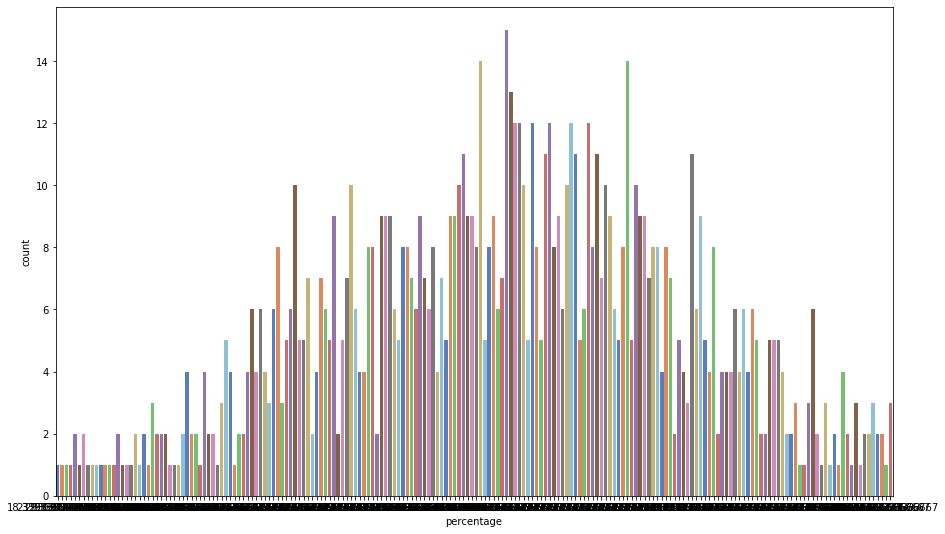

In [87]:
p = sns.countplot(x="percentage", data = student_performance_data, palette="muted")
_ = plt.setp(p.get_xticklabels(), rotation=0) 

In [88]:
# Assigning grades to the grades according to the following criteria :
# 0  - 40 marks : grade E
# 41 - 60 marks : grade D
# 60 - 70 marks : grade C
# 70 - 80 marks : grade B
# 80 - 90 marks : grade A
# 90 - 100 marks : grade O

def getgrade(percentage, status):
  if status == 'Fail':
    return 'E'
  if(percentage >= 90):
    return 'O'
  if(percentage >= 80):
    return 'A'
  if(percentage >= 70):
    return 'B'
  if(percentage >= 60):
    return 'C'
  if(percentage >= 40):
    return 'D'
  else :
    return 'E'

student_performance_data['grades'] =student_performance_data.apply(lambda x: getgrade(x['percentage'], x['status']), axis = 1 )

student_performance_data['grades'].value_counts()

B    261
C    256
D    234
A    146
O     52
E     51
Name: grades, dtype: int64

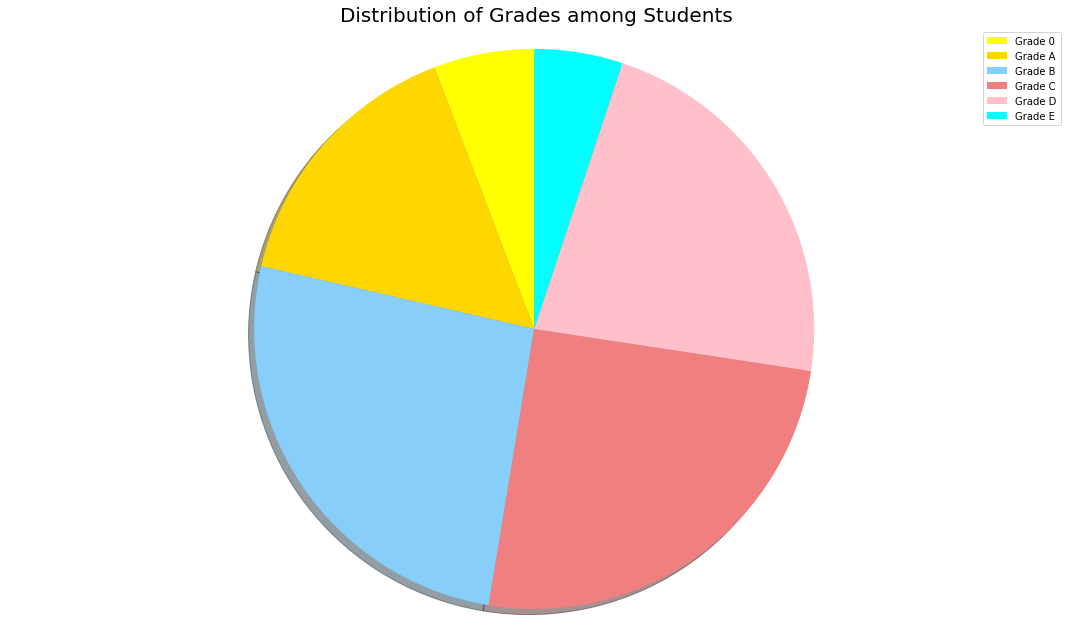

In [89]:
# plotting a pie chart for the distribution of various grades amongst the students

labels = ['Grade 0', 'Grade A', 'Grade B', 'Grade C', 'Grade D', 'Grade E']
sizes = [58, 156, 260, 252, 223, 51]
colors = ['yellow', 'gold', 'lightskyblue', 'lightcoral', 'pink', 'cyan']
explode = (0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001)

patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels)
plt.title('Distribution of Grades among Students', fontweight = 30, fontsize = 20)
plt.axis('equal')
plt.tight_layout()
plt.show()


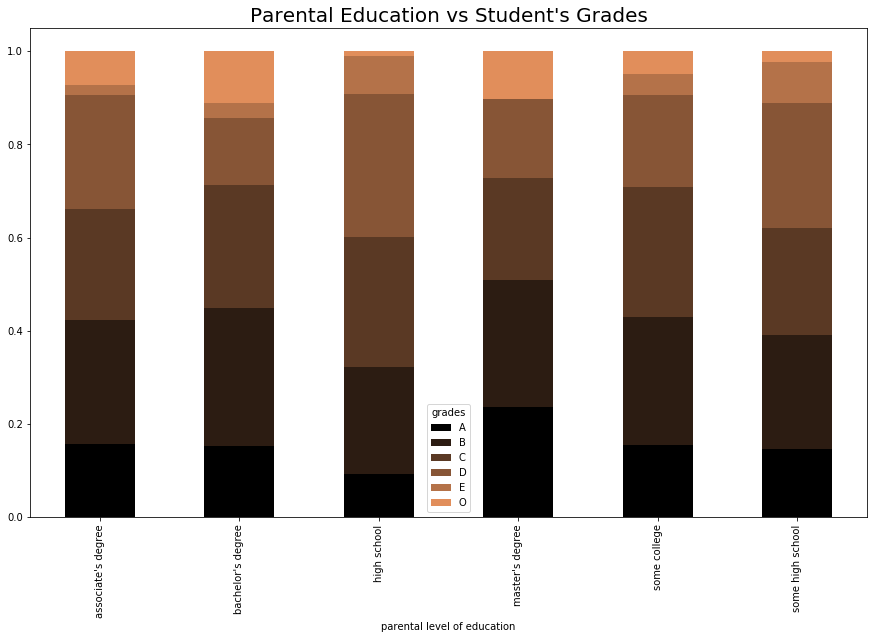

In [90]:
# comparison parent's degree and their corresponding grades

plt.rcParams['figure.figsize'] = (15, 9)

x = pd.crosstab(student_performance_data['parental level of education'], student_performance_data['grades'])
color = plt.cm.copper(np.linspace(0, 1, 8))
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, color = color)
plt.title("Parental Education vs Student's Grades", fontweight = 30, fontsize = 20)
plt.show()

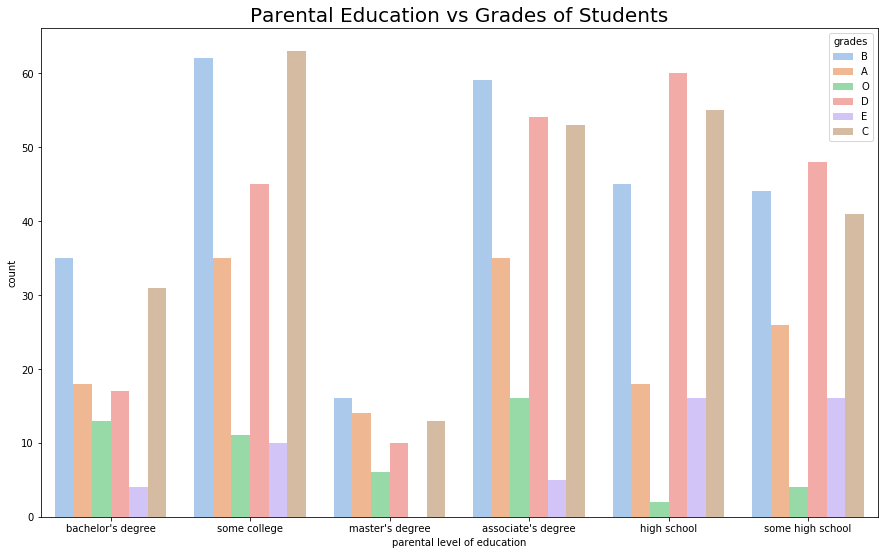

In [91]:
# for better visualization we will plot it again using seaborn

sns.countplot(x = student_performance_data['parental level of education'], data = student_performance_data, hue = student_performance_data['grades'], palette = 'pastel')
plt.title('Parental Education vs Grades of Students', fontsize = 20, fontweight = 30)
plt.show()

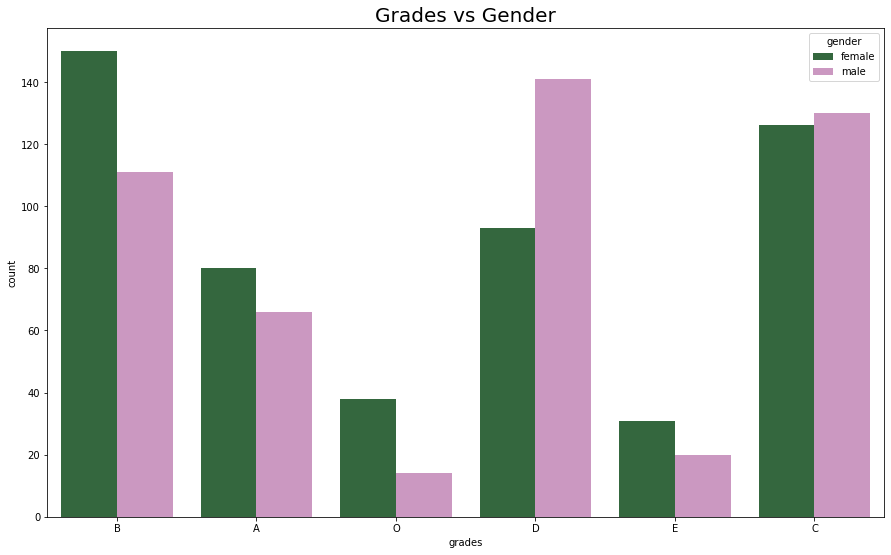

In [92]:
# comparing the distribution of grades among males and females

sns.countplot(x = student_performance_data['grades'], data = student_performance_data, hue =student_performance_data['gender'], palette = 'cubehelix')
#sns.palplot(sns.dark_palette('purple'))
plt.title('Grades vs Gender', fontweight = 30, fontsize = 20)
plt.show()

Checking out the toppers.

In [93]:
student_performance_data[(student_performance_data['math score'] > 90) & (student_performance_data['reading score'] > 90) & (student_performance_data['writing score']>90)]\
.sort_values(by=['total score'],ascending=False)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,Pass/Fail,pass_math,pass_reading,pass_writing,status,percentage,grades
962,female,group E,associate's degree,standard,none,100,100,100,300,P,Pass,Pass,Pass,pass,100.000000,O
458,female,group E,bachelor's degree,standard,none,100,100,100,300,P,Pass,Pass,Pass,pass,100.000000,O
916,male,group E,bachelor's degree,standard,completed,100,100,100,300,P,Pass,Pass,Pass,pass,100.000000,O
114,female,group E,bachelor's degree,standard,completed,99,100,100,299,P,Pass,Pass,Pass,pass,99.666667,O
179,female,group D,some high school,standard,completed,97,100,100,297,P,Pass,Pass,Pass,pass,99.000000,O
712,female,group D,some college,standard,none,98,100,99,297,P,Pass,Pass,Pass,pass,99.000000,O
625,male,group D,some college,standard,completed,100,97,99,296,P,Pass,Pass,Pass,pass,98.666667,O
165,female,group C,bachelor's degree,standard,completed,96,100,100,296,P,Pass,Pass,Pass,pass,98.666667,O
903,female,group D,bachelor's degree,free/reduced,completed,93,100,100,293,P,Pass,Pass,Pass,pass,97.666667,O
149,male,group E,associate's degree,free/reduced,completed,100,100,93,293,P,Pass,Pass,Pass,pass,97.666667,O


The first two toppers are either geniuses or they did some malpractice as their test preparation course was none.

## CONCLUSIONS

1)Girls performed better than boys in reading as well as writing but boys have performed better in mathematics than girls.<br>
2)Students whose parents have higher level of education have performed better.<br>
3)Students taking standard lunch are performing much better than the students taking free/reduced lunch.<br>
4)Students belonging to group E of race/ethnicity have performed better than any other group.<br>
5)Completing a test preparation course is really helping students a lot to achieve high marks in every subject.<br>

                                                     THANK YOU !!